In [25]:
import pandas as pd

In [39]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [26]:
df = pd.read_excel(r"C:/Users/user/Downloads/nyc-violation-ticket.xlsx")
df.head(5)


,,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4714702166,KGK6659,NY,PAS,2020-11-12,36,4DSD,BMW,V,0,...,GY,NaN,2007,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
1,8793684599,L5232HY,TN,PAS,2020-09-14,21,TRAC,INTER,T,60790,...,WHITE,NaN,0,NaN,0,W,NaN,NaN,NaN,NaN
2,8864757053,BPMN76,FL,PAS,2020-11-25,20,SUBN,NISSA,T,36030,...,BLACK,NaN,0,NaN,0,49,20A-No Parking (Non-COM),NaN,NaN,NaN
3,8778326047,57387MJ,NY,COM,2020-08-20,38,VAN,NaN,T,34430,...,WH,NaN,2016,NaN,0,1,NaN,NaN,NaN,NaN
4,4706640702,M81KFJ,NJ,PAS,2020-09-09,36,UT,TOYOT,V,0,...,NaN,NaN,2002,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN


In [13]:
# What are the most common types od violations?

In [27]:
common_violations = df['Violation Description'].value_counts().sort_values(ascending=False).head(5)
common_violations

Violation Description
PHTO SCHOOL ZN SPEED VIOLATION    14422
FAILURE TO STOP AT RED LIGHT       1692
BUS LANE VIOLATION                 1435
21-No Parking (street clean)        814
38-Failure to Dsplay Meter Rec      707
Name: count, dtype: int64

In [28]:
# Are there any missing values in the dataset?
df.isna().sum()


                                         0
Plate ID                                 0
Registration State                       0
Plate Type                               0
Issue Date                               0
Violation Code                           0
Vehicle Body Type                      145
Vehicle Make                           136
Issuing Agency                           0
Street Code1                             0
Street Code2                             0
Street Code3                             0
Vehicle Expiration Date                  0
Violation Location                   17893
Violation Precinct                       0
Issuer Precinct                          0
Issuer Code                              0
Issuer Command                       17857
Issuer Squad                         17857
Violation Time                           1
Time First Observed                  48111
Violation County                       117
Violation In Front Of Or Opposite    18068
House Numbe

In [ ]:
# How to handle missing values in the dataset?

In [29]:
# df.dropna(inplace=True)
# df.fillna()

In [31]:
columns_to_drop = ((df.isna().sum()/len(df))*100) > 80
df.drop(columns_to_drop[columns_to_drop.values == True].index.tolist(),axis=1,inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0                                      50000 non-null  int64         
 1   Plate ID                           50000 non-null  object        
 2   Registration State                 50000 non-null  object        
 3   Plate Type                         50000 non-null  object        
 4   Issue Date                         50000 non-null  datetime64[ns]
 5   Violation Code                     50000 non-null  int64         
 6   Vehicle Body Type                  49855 non-null  object        
 7   Vehicle Make                       49864 non-null  object        
 8   Issuing Agency                     50000 non-null  object        
 9   Street Code1                       50000 non-null  int64         
 10  Street Code2                      

In [ ]:
# What is the average fine amount for each violation type?
# avg_fine_by_violation = df.groupby('Violation Description')

In [35]:
#Converting the date from object to datetime
df['Issue Date'] = pd.to_datetime(df['Issue Date'], format= 'mixed', dayfirst=True)

In [33]:
# How have violations changed over time(e.g monthly or yearly trends)?

df['Month'] = df['Issue Date'].dt.month
df['Year'] = df['Issue Date'].dt.year
# Group by month and year, and count records in each group
grouped_data = df.groupby(['Year','Month']).size().reset_index(name='Record Count').sort_values(by = 'Record Count', ascending=False)
grouped_data1 = grouped_data.head(10)
grouped_data1

,Year,Month,Record Count
7,2020,9,11021
8,2020,10,10797
6,2020,8,10658
5,2020,7,7900
9,2020,11,7676
4,2020,6,1839
3,2020,5,101
2,2020,2,2
0,2010,10,1
1,2019,12,1


Text(0.5, 1.0, 'Violations change over time monthly')

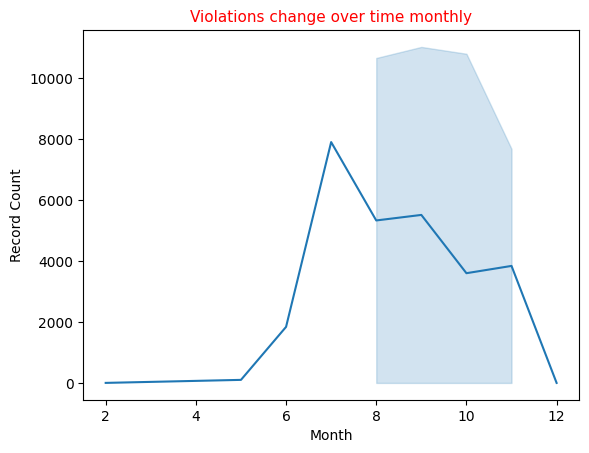

In [43]:
sns.lineplot(x='Month', y='Record Count', data=grouped_data)

# Set the Y-axis scale and format the tick labels
# plt.ylim(0, grouped_data['Record Count'].max() * 0.3)  # Use state_summons1 for setting the Y-axis limit
# plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title("Violations change over time monthly", fontsize= 11, color="red")

Text(0.5, 1.0, 'Violations change over time yearly')

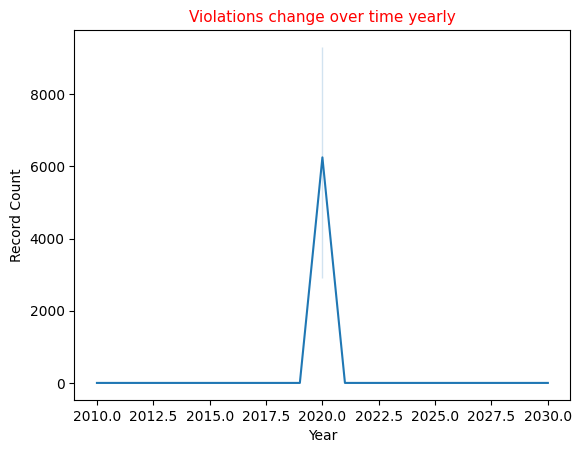

In [44]:
sns.lineplot(x='Year', y='Record Count', data=grouped_data)

# Set the Y-axis scale and format the tick labels
# plt.ylim(0, grouped_data['Record Count'].max() * 0.3)  # Use state_summons1 for setting the Y-axis limit
# plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title("Violations change over time yearly", fontsize= 11, color="red")